In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from datetime import datetime, timedelta

from population import Population

%matplotlib inline

In [5]:
population_file_name = 'cdata/population.json'
population = Population.from_json(population_file_name)

In [11]:
print len(population.people)
print population.world.to_serializable()
print population.transcript_file_name
population.transcript_file_name = 'cdata0/transcript.json'
#print population.portfolio.values()[0].to_serializable()
print population.people.values()[0].to_serializable()
print population.people.values()[0].last_viewed_offer
print population.people.values()[0].history

for person in population.people.values():
    person.last_viewed_offer = None
    person.history = [1]

print population.people.values()[0].history

#import THEkpi
#import KPIs_segmented

#print THEkpi.THEKPI(population,population.people)
#print KPIs_segmented.KPI2(population,population.people)
#print KPIs_segmented.KPI3(population,population.people)
#print KPIs_segmented.KPI4(population,population.people,debugging=True)
#print KPIs_segmented.KPI5(population,population.people)
#print KPIs_segmented.KPI6(population,population.people)

5000
{'world_time': 0, 'world_time_tick': 6, 'real_time_tick': 0.0}
cdata0/transcript.json
{'last_viewed_offer': None, 'taste': {'weights': [1, 1, 1, 1, 1], 'names': ['sweet', 'sour', 'salty', 'bitter', 'umami']}, 'marketing_segment': {'weights': [1, 1, 1, 1, 1, 1], 'names': [u'front page', u'local', u'entertainment', u'sports', u'opinion', u'comics']}, 'view_offer_sensitivity': {'weights': [-5.3862943611198908, -0.0063821109029647081, 0.0, 1.0, 1.0, 2.0], 'names': ['background', 'offer_age', 'web', 'email', 'mobile', 'social']}, 'last_transaction': None, 'last_unviewed_offer': None, 'id': u'8f05f7e60cd54246a98fa36040bf11bc', 'dob': u'19920205', 'gender': u'F', 'purchase_amount_sensitivity': {'weights': [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'names': ['background', 'income_adjusted_purchase_sensitivity', 'front page', 'local', 'entertainment', 'sports', 'opinion', 'comics', 'sweet', 'sour', 'salty', 'bitter', 'umami']}, 'make_purchase_sensitivity': {'weights': [-3.1354942159291497, 0

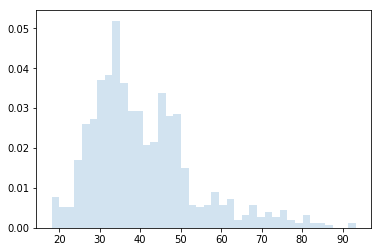

In [8]:
dt_fmt = '%Y%m%d'
now = datetime.strptime('20170718', dt_fmt)

ages = list()
for person in population.people.values():
    if person.dob is not None:
        age = now - datetime.strptime(person.dob, dt_fmt)
        if age.days/365.25 < 100:
            ages.append(age.days/365.25)

plt.hist(ages, bins=40, normed=True, alpha=0.2);

In [9]:
stats = dict([(person_id, {'group': 'control',
                           'viewed': 0,
                           'trx': 0,
                           'spend': 0.00}) for person_id in population.people])

transcript_file_name = 'cluster_data0/transcript.json'
with open(transcript_file_name, 'r') as transcript_file:
    for line_number, line in enumerate(transcript_file):
        text = line.strip()
        if text != '':
            record = json.loads(text)
        
        if record['event'] == 'offer received':
            stats[record['person']]['group'] = 'target'
        
        if record['event'] == 'offer viewed':
            stats[record['person']]['viewed'] += 1
        
        if record['event'] == 'transaction':
            stats[record['person']]['trx'] += 1
            stats[record['person']]['spend'] += record['value']['amount']

IOError: [Errno 2] No such file or directory: 'cluster_data0/transcript.json'

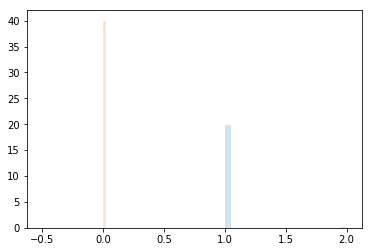

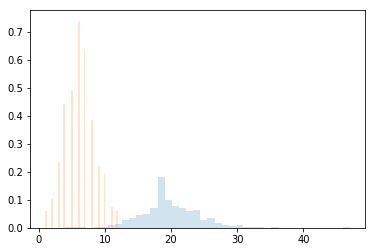

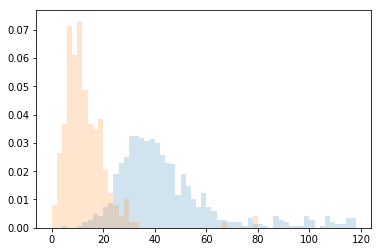

In [25]:
group_stats = {'target': {'viewed': list(), 'trx': list(), 'spend': list()},
               'control': {'viewed': list(), 'trx': list(), 'spend': list()}}

for val in stats.values():
    group = val['group']
    for field in ['viewed', 'trx', 'spend']:
        group_stats[group][field].append(val[field])

plt.hist(group_stats['target']['viewed'], bins=40, normed=True, alpha=0.2);
plt.hist(group_stats['control']['viewed'], bins=40, normed=True, alpha=0.2);
plt.show()

plt.hist(group_stats['target']['trx'], bins=40, normed=True, alpha=0.2);
plt.hist(group_stats['control']['trx'], bins=40, normed=True, alpha=0.2);
plt.show()

plt.hist(group_stats['target']['spend'], bins=range(0, 120, 2), normed=True, alpha=0.2);
plt.hist(group_stats['control']['spend'], bins=range(0, 120, 2), normed=True, alpha=0.2);
plt.show()

In [9]:
population.world.world_time

0